In [18]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [96]:
%matplotlib inline
from matplotlib import style
import matplotlib.dates as mdates
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [16]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
#  3. Convert the June temperatures to a list.
june_results = session.query(Measurement.date,Measurement.tobs).filter((extract('month', Measurement.date) == 6)).all()
#june_results

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [21]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['date','temp'])
# june_df

In [20]:
june_df

,date,temp
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [22]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [24]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
# 7. Convert the December temperatures to a list.
dec_results = session.query(Measurement.date,Measurement.tobs).filter((extract('month', Measurement.date) == 12)).all()
#dec_results

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [28]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['date','temp'])
dec_df

,date,temp
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [29]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additioanl Analysis and Comparison Between June & Dec

In [64]:
# count [number of times it rained] precipitation for June grouped by year
jun_count = session.query(Measurement.date, func.count(Measurement.prcp)).\
group_by(extract('year', Measurement.date)).filter(Measurement.prcp >=1).\
filter((extract('month', Measurement.date) == 6)).order_by(Measurement.date.asc())
#jun_count

In [99]:
jun_count_df=pd.DataFrame(jun_count, columns=['Year', 'June'])
jun_count_df.set_index(jun_count_df['Year'], inplace=True)
jun_count_df

,Year,June
Year,,
2011-06-04,2011-06-04,13
2012-06-20,2012-06-20,2
2013-06-26,2013-06-26,6
2014-06-09,2014-06-09,4
2015-06-30,2015-06-30,6
2016-06-01,2016-06-01,7
2017-06-15,2017-06-15,1


In [86]:
jun_count_df.describe()

,June
count,7.000000
mean,5.571429
std,3.952094
min,1.000000
25%,3.000000
50%,6.000000
75%,6.500000
max,13.000000


<AxesSubplot:xlabel='Year'>

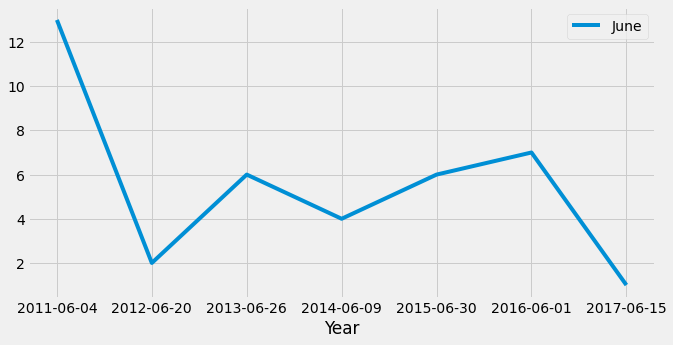

In [84]:
jun_count_df.plot(figsize = (10,5))

In [66]:
# count [number of times it rained] precipitation for December grouped by year
dec_count = session.query(Measurement.date, func.count(Measurement.prcp)).\
group_by(extract('year', Measurement.date)).filter(Measurement.prcp >= 1).\
filter((extract('month', Measurement.date) == 12)).order_by(Measurement.date.asc())


In [100]:
dec_count_df=pd.DataFrame(dec_count, columns=['Year', 'December'])
dec_count_df.set_index(dec_count_df['Year'], inplace=True)
dec_count_df

,Year,December
Year,,
2010-12-10,2010-12-10,33
2011-12-13,2011-12-13,11
2012-12-05,2012-12-05,3
2013-12-02,2013-12-02,14
2014-12-04,2014-12-04,15
2015-12-19,2015-12-19,4
2016-12-02,2016-12-02,8


In [87]:
dec_count_df.describe()

,December
count,7.000000
mean,12.571429
std,10.113640
min,3.000000
25%,6.000000
50%,11.000000
75%,14.500000
max,33.000000


<AxesSubplot:xlabel='Year'>

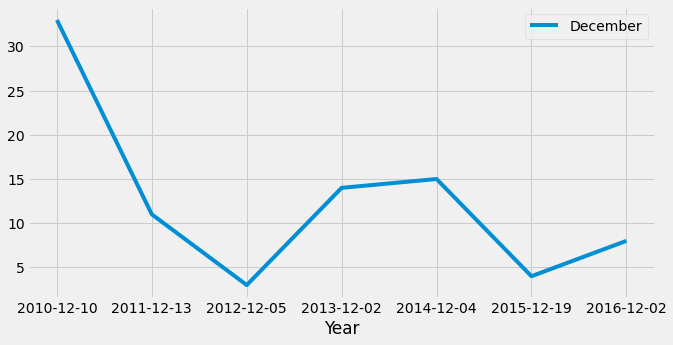

In [81]:
dec_count_df.plot(figsize = (10,5))

In [69]:
# Total precipitation level for June
jun_results = session.query(Measurement.prcp).filter((extract('month', Measurement.date) == 6)).all()
tot_jun_df = pd.DataFrame(jun_results, columns=['precipitation'])
tot_jun_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [70]:
# Total precipitation level for December
dec_results = session.query(Measurement.prcp).filter((extract('month', Measurement.date) == 12)).all()
tot_dec_df = pd.DataFrame(dec_results, columns=['precipitation'])
tot_dec_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
